**Mount Drive to read dataset from Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Quora Toxic Question/quora-insincere-questions-classification'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

/content/drive/MyDrive/Quora Toxic Question/quora-insincere-questions-classification/embeddings.zip
/content/drive/MyDrive/Quora Toxic Question/quora-insincere-questions-classification/sample_submission.csv
/content/drive/MyDrive/Quora Toxic Question/quora-insincere-questions-classification/test.csv
/content/drive/MyDrive/Quora Toxic Question/quora-insincere-questions-classification/train.csv


In [3]:
df_sample_sub = pd.read_csv('/content/drive/MyDrive/Quora Toxic Question/quora-insincere-questions-classification/sample_submission.csv')
df_train = pd.read_csv('/content/drive/MyDrive/Quora Toxic Question/quora-insincere-questions-classification/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Quora Toxic Question/quora-insincere-questions-classification/test.csv')

In [4]:
df_sample_sub.head(5)

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0


In [5]:
df_test.head(5)

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In [6]:
df_train.head(5)

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   qid            1306122 non-null  object
 1   question_text  1306122 non-null  object
 2   target         1306122 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


In [8]:
print('size: ', df_train.size, '\ncolumn: ', df_train.columns)

size:  3918366 
column:  Index(['qid', 'question_text', 'target'], dtype='object')


In [9]:
df_train.target.value_counts()

0    1225312
1      80810
Name: target, dtype: int64

In [10]:
df_train.target.value_counts(normalize=True)

0    0.93813
1    0.06187
Name: target, dtype: float64

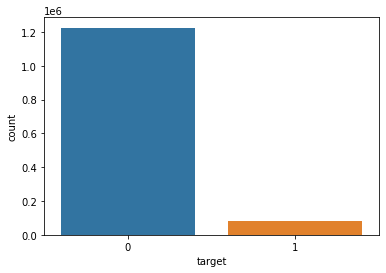

In [11]:
sns.countplot(data = df_train, x='target')

In [12]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# nltk.download('stopwords')
# nltk_stopwords = stopwords.words('english')

# wordnet_lemmatizer = WordNetLemmatizer()

# def lemSentence(sentence):
#     token_words = word_tokenize(sentence)
#     lem_sentence = []
#     for word in token_words:
#         lem_sentence.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
#         lem_sentence.append(" ")
#     return "".join(lem_sentence)

# def clean(message, lem=True):
#     # Remove ponctuation
#     message = message.translate(str.maketrans('', '', string.punctuation))
    
#     # Remove numbers
#     message = message.translate(str.maketrans('', '', string.digits))
    
#     # Remove stop words
#     message = [word for word in word_tokenize(message) if not word.lower() in nltk_stopwords]
#     message = ' '.join(message)
    
#     # Lemmatization (root of the word)
#     if lem:
#         message = lemSentence(message)
    
#     return message

In [13]:
import re

def clean_data(data):
    tag=re.compile(r'[0-9]+')
    data=tag.sub(r'',data)
    punct_tag=re.compile(r'[^\w\s]')
    data=punct_tag.sub(r'',data)
    tag=re.compile(r'\s+')
    data=tag.sub(r' ',data)
    red_tag=re.compile(r'[?<=(  )\\]|[&&|\|\|-]')
    data=red_tag.sub(r' ',data)
    return "".join(data)

In [14]:
#stemmimng the text
from nltk.stem.porter import PorterStemmer
from nltk.stem import *

def stem_corpus(data):
    stemmer = PorterStemmer()
    out_data=""
    for words in data:
        out_data += stemmer.stem(words)
    return out_data

In [15]:
#Converting uppercase letters to lowercase

def convert_2lowercase(data):
    data =[string.lower() for string in data if string.isupper]
    return ''.join(data)

In [16]:
# Cleaning the questions (Really slow process, to be changed !)
# nltk.download('punkt')
# nltk.download('wordnet')
# df_train['question_text_cleaned'] = df_train.question_text.apply(lambda x: clean(x, True))

df_train['question_text_cleaned'] = df_train.question_text.apply(lambda x: convert_2lowercase(stem_corpus(clean_data(x))))

In [17]:
df_train.head(5)

,qid,question_text,target,question_text_cleaned
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,how did quebec nationalists see their province...
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,do you have an adopted dog how would you encou...
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,why does velocity affect time does velocity af...
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,how did otto von guericke used the magdeburg h...
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,can i convert montra helicon d to a mountain b...


In [18]:
from nltk import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import GRU,Bidirectional,Embedding,Dense,Flatten,GlobalMaxPool1D,LSTM
from keras.models import Sequential

In [19]:
num_words=3000
max_len=200
tokenizer=Tokenizer(num_words,oov_token='<oov>')
tokenizer.fit_on_texts(df_train.question_text_cleaned)
train_sequences=tokenizer.texts_to_sequences(df_train.question_text_cleaned)
test_sequences=tokenizer.texts_to_sequences(df_test.question_text)

# let's pad the sequences to make them of equal length

train_padded=pad_sequences(train_sequences,maxlen=max_len)
test_padded=pad_sequences(test_sequences,maxlen=max_len)

In [20]:
import tensorflow as tf

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect() # TPU detection
  strategy = tf.distribute.TPUStrategy(tpu)
  print('Use TPU')
except ValueError:
    if len(tf.config.list_physical_devices('GPU')) > 0:
        strategy = tf.distribute.MirroredStrategy()
        print('Use GPU')
    else:
        strategy = tf.distribute.get_strategy()
        print('Use CPU')

INFO:tensorflow:Initializing the TPU system: grpc://10.18.78.154:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.18.78.154:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Use TPU


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf


#Logistic Regression Model
count_vectorizer = CountVectorizer()
model = LogisticRegression(C=1, random_state=0, solver='lbfgs', max_iter=1000)
vectorize_model_pipeline = Pipeline([
    ('count_vectorizer', count_vectorizer),
    ('model', model)
])

# Sequential Model
def create_model():
  return Sequential([Embedding(num_words,128,input_length=max_len),
                 Bidirectional(LSTM(128,return_sequences=True)),
                               GlobalMaxPool1D(),
                              Dense(128,activation='relu'),
                              Dense(1,activation='sigmoid')])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_train['question_text_cleaned'], df_train['target'], test_size=0.3)
vectorize_model_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('count_vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('model',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
             

In [23]:
tf.compat.v1.disable_eager_execution()
init = tf.compat.v1.global_variables_initializer()

In [24]:
# batch_size=512
# epochs=5
# with strategy.scope():
#   seq_model = create_model()
#   seq_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#   # seq_model.fit(x=train_padded, 
#   #               y=df_train.target.values,
#   #               epochs=epochs,
#   #               batch_size=batch_size,
#   #               validation_split=.1)
  
# seq_model.fit(x=train_padded, 
#               y=df_train.target.values,
#               epochs=epochs,
#               batch_size=batch_size,
#               verbose = 1)

In [25]:
predictions = vectorize_model_pipeline.predict(X_test)

In [26]:
# with strategy.scope():
#   predicted=seq_model.predict(test_padded, verbose = 1, batch_size=4096)

In [27]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
len(predictions)

391837

In [29]:
len(y_test)

391837

In [30]:
# predicted2 = (predicted < 0.5).astype(int)

In [31]:
print('Logistic Regression Accuracy :', accuracy_score(y_test, predictions))
from sklearn import metrics
f1 = metrics.f1_score(y_test, predictions)
print('F1 score :', f1)

Logistic Regression Accuracy : 0.9538762291463032
F1 score : 0.5497396546999178


In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98    367431
           1       0.70      0.45      0.55     24406

    accuracy                           0.95    391837
   macro avg       0.83      0.72      0.76    391837
weighted avg       0.95      0.95      0.95    391837

